This notebook was made after a message from Rose about taking the mean of each spectra

# Initialization

Importing the libraries and the data

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
sldf = pd.read_csv('../data/spectral_library.csv')
metadf = pd.read_csv('../data/sample_list_v2.csv')

Setting wavelength to dataframe index

In [4]:
sldf.set_index('Wvl',inplace = True)

Taking only the mean columns and removing `_mean` from all the column names (so we can merge with the sample info)

In [5]:
meandf = sldf.filter(regex = '_mean')
meandf = meandf.rename(columns=lambda x: re.sub('_mean','',x))

# Calculating mean spectra

Need to subset asco, fucus, Basin and Pemaquid

In [14]:
speciesregexes = ['sco','ucus']
siteregexes = ['Basin','Pemaquid']

In [15]:
meanspectra = {}
for sp in speciesregexes:
    spdf = meandf.filter(regex = sp)
    for site in siteregexes:
        df = spdf.filter(regex = site)
        
        meanspectra[site+'_'+sp] = df.mean(axis=1)

meanspectra = pd.DataFrame(meanspectra)

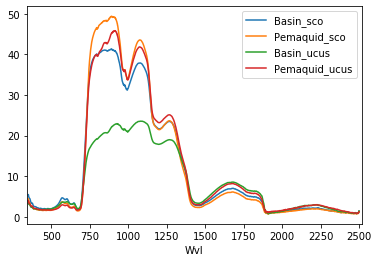

In [16]:
meanspectra.plot()

# Drone wavelengths

For now, just pulling out the nominal wavelengths (rather than averaging over the bands)

In [17]:
wvls = [444,475,531,560,650,668,705,717,740,841]

In [21]:
meanspectra.loc[wvls]

,Basin_sco,Pemaquid_sco,Basin_ucus,Pemaquid_ucus
Wvl,,,,
444,1.936726,1.546995,1.757179,1.680599
475,2.020422,1.636001,1.916648,1.718360
531,2.619625,2.106643,2.417116,1.901185
560,4.206708,3.358867,3.285353,2.687807
650,3.317021,2.515193,3.187986,2.265256
668,1.793149,1.459597,2.081792,1.660206
705,8.515941,6.526787,7.045339,6.334690
717,16.278881,13.631047,11.043701,13.947017
740,32.089924,33.695090,16.097114,30.779602
